# Importing libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')  #importing dataset 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


So we have null values in item weight and outlet size columns

# Exploratory Data Analysis

## Univariate Analysis

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

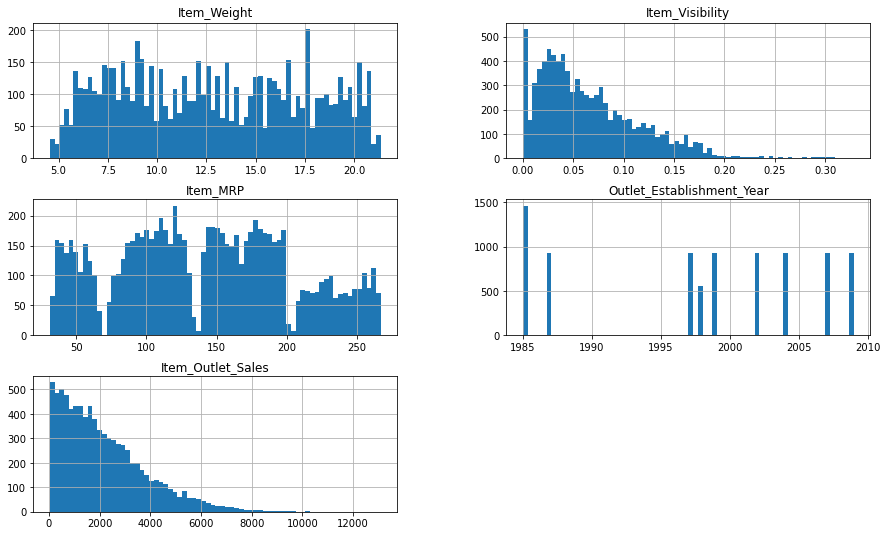

In [4]:
df.hist(figsize=(15,9),grid=True, bins=70)  # univariate visualization plot of numerical features

So this shows that item_outlet_sales is left skewed 

In [5]:
  df['Item_Outlet_Sales'].var()  # we can also see here that variance of 'Item_Outlet_Sales' is very high

2912140.938499716

 ### Now lets check unique categories in categorical features

In [6]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [11]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### 'Item_Fat_Content' feature actually has only 2 categoreies viz. low fat and regular. we will have combine rest of them into these two categories. So let's do it right now

In [12]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'LF','low fat':'LF','Regular':'reg'})
df['Item_Fat_Content'].unique()    # this will classify all the data in regular and low fat categories

array(['LF', 'reg'], dtype=object)

In [13]:
num_features = df.select_dtypes(include=['number'])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [14]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
dfc = df[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size']]
dfc.columns   # seperating categorical features from others 

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'],
      dtype='object')

 ### plotting countplot of categorical features

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

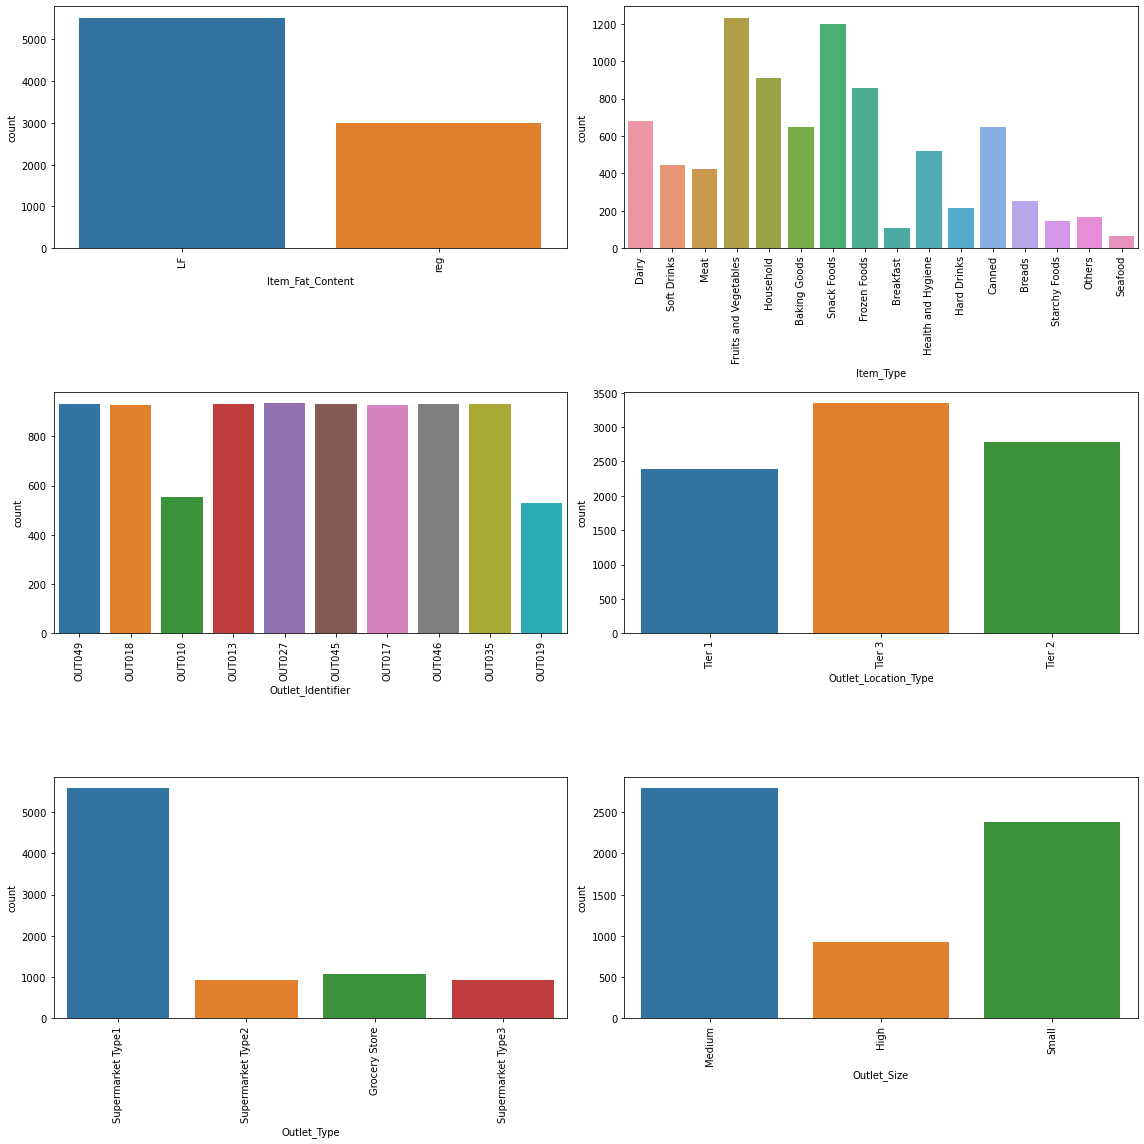

In [16]:
plt.figure(figsize=(16,16))   
for i in range(1,7):
    plt.subplot(3,2,i)
    sns.countplot(dfc[dfc.columns[i-1]])
    plt.xticks(rotation=90)
plt.tight_layout()

## Bivariate plots

<Figure size 1152x1152 with 0 Axes>

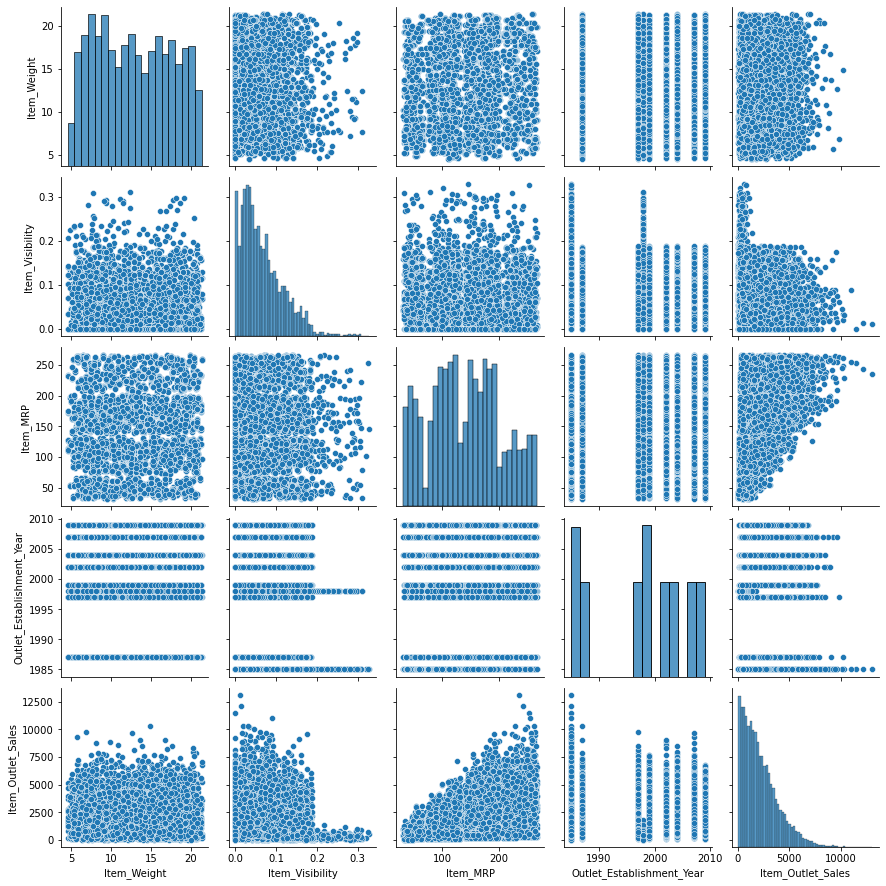

In [17]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

### Now comparing categorical features with outlet sales

### Item_Fat_Content and Item_Outlet_Sales analysis

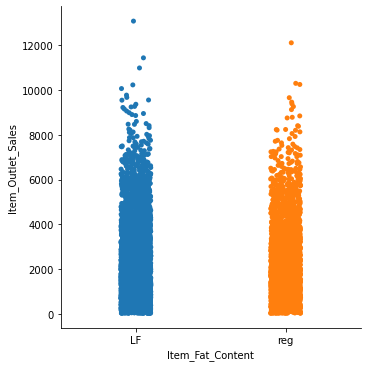

In [18]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

### Item_Type and Item_Outlet_Sales Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

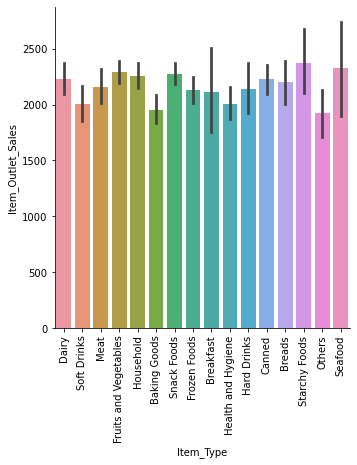

In [19]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### 'Outlet_Identifier' and 'Item_Outlet_Sales' Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

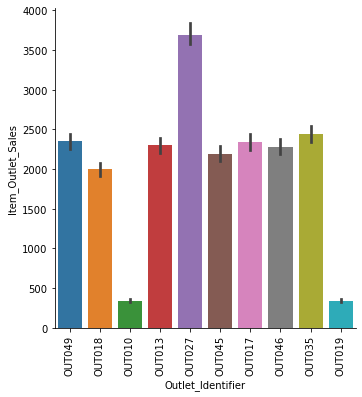

In [20]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### 'Outlet_Location_Type' and 'Item_Outlet_Sales' Analysis

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

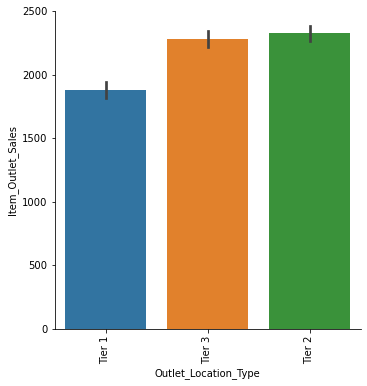

In [21]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### 'Outlet_Type' and  Item_Outlet_Sales Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

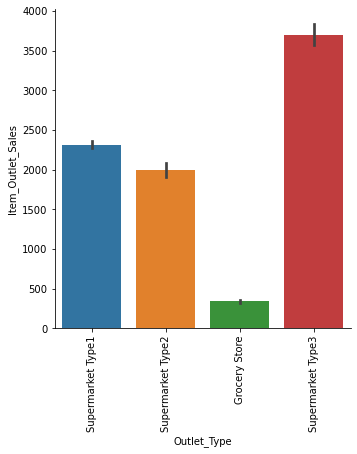

In [22]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

so we find that:
1. sales from tier 1 location is less than tier 2 and tier3
2. Grocery store has least sales and Supermarket type 3 has highest sales
3. sales from outlet 10 and 19 are very less as compared to others
4. there are 16 categories in item type features which are:
       ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood']
   and all of these can be clubbed into 3 categories [food items, drinkable items and non edibles]
5. Some of the items had 0 visibility which doesnt make any sense so we'll have to take of that too
6. we can also convert Outlet_Establishment_Year column to age of outlet by subtracting establishment year from 2013 to get age of establishment

# DATA PRE PROCESSING

In [23]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [24]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())  #filling null values with mean

In [25]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])   #filling null values with mode

In [26]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
df['Item_Visibility'] = df['Item_Visibility'].mask( df['Item_Visibility']==0, df['Item_Visibility'].mean())  #filling items with 0 visibilty with mean value

In [28]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.066132
4       0.066132
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [29]:
df['Item_Type_combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])  #clubbing item types into 3 categories  [food items, drinkable items and non edibles]

In [30]:
df['Item_Type_combined']=df['Item_Type_combined'].map({'FD':'Food','DR': 'Drink','NC':'Non-Consumable'})

In [31]:
df['age_of_outlet'] = 2013-df['Outlet_Establishment_Year']   # replacing year of establishment with age of outlet till 2013(since data was collected in 2013)

In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,age_of_outlet
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,reg,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,LF,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [33]:
df = df.drop(columns=['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier']) # dropping old columns from which we made new modified columns
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,age_of_outlet
0,9.300,LF,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920,reg,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,17.500,LF,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200,reg,0.066132,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.930,LF,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,LF,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,8.380,reg,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,10.600,LF,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,7.210,reg,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [34]:
df = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_combined',
       'age_of_outlet','Item_Outlet_Sales']]  # rearranging columns to set Target column on which we have to make prediction(i.e Item_Outlet_Sales) to the end of dataframe

In [35]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,age_of_outlet,Item_Outlet_Sales
0,9.300,LF,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,Food,14,3735.1380
1,5.920,reg,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,Drink,4,443.4228
2,17.500,LF,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,Food,14,2097.2700
3,19.200,reg,0.066132,182.0950,Medium,Tier 3,Grocery Store,Food,15,732.3800
4,8.930,LF,0.066132,53.8614,High,Tier 3,Supermarket Type1,Non-Consumable,26,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,LF,0.056783,214.5218,High,Tier 3,Supermarket Type1,Food,26,2778.3834
8519,8.380,reg,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,Food,11,549.2850
8520,10.600,LF,0.035186,85.1224,Small,Tier 2,Supermarket Type1,Non-Consumable,9,1193.1136
8521,7.210,reg,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,Food,4,1845.5976


# ENCODING CATEGORICAL DATA

In [36]:
fat_content = pd.get_dummies(df['Item_Fat_Content'],drop_first=True) # using dummy variables to encode categorical data
outlet_size = pd.get_dummies(df['Outlet_Size'],drop_first=True)
loc_type = pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)
outlet_Type = pd.get_dummies(df['Outlet_Type'],drop_first=True)
item_type = pd.get_dummies(df['Item_Type_combined'],drop_first=True)
df.drop(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_combined'],inplace=True)
df = pd.concat([df,fat_content,outlet_size,loc_type,outlet_Type,item_type],axis=1)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age_of_outlet','reg', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Food',
       'Non-Consumable','Item_Outlet_Sales']]

In [38]:
df

,Item_Weight,Item_Visibility,Item_MRP,age_of_outlet,reg,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable,Item_Outlet_Sales
0,9.300,0.016047,249.8092,14,0,1,0,0,0,1,0,0,1,0,3735.1380
1,5.920,0.019278,48.2692,4,1,1,0,0,1,0,1,0,0,0,443.4228
2,17.500,0.016760,141.6180,14,0,1,0,0,0,1,0,0,1,0,2097.2700
3,19.200,0.066132,182.0950,15,1,1,0,0,1,0,0,0,1,0,732.3800
4,8.930,0.066132,53.8614,26,0,0,0,0,1,1,0,0,0,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,0,0,0,0,1,1,0,0,1,0,2778.3834
8519,8.380,0.046982,108.1570,11,1,1,0,1,0,1,0,0,1,0,549.2850
8520,10.600,0.035186,85.1224,9,0,0,1,1,0,1,0,0,0,1,1193.1136
8521,7.210,0.145221,103.1332,4,1,1,0,0,1,0,1,0,1,0,1845.5976


#### Normalizing item outlet sales

In [39]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])


<AxesSubplot:>

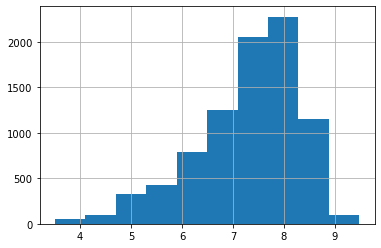

In [40]:
df['Item_Outlet_Sales'].hist()

In [41]:
df['Item_Outlet_Sales'].var()

1.0345091892310476

In [42]:
df.var()

Item_Weight            17.860122
Item_Visibility         0.002376
Item_MRP             3878.183909
age_of_outlet          70.086372
reg                     0.228327
Medium                  0.237825
Small                   0.201704
Tier 2                  0.220015
Tier 3                  0.238591
Supermarket Type1       0.226204
Supermarket Type2       0.097038
Supermarket Type3       0.097680
Food                    0.202219
Non-Consumable          0.152430
Item_Outlet_Sales       1.034509
dtype: float64

##### High variance of item_weight, item_mrp and age_of_outlet that you are seeing here will be taken care off by log transformation method that we'll be using next

In [43]:
df[['Item_Weight','Item_MRP','age_of_outlet']] = np.log(df[['Item_Weight','Item_MRP','age_of_outlet']]) # applying log transformation

##### Usually we perform standardization or normalization after splitting dataset into training set and testing set but here log transformation works on individual data rather than working on whole hence we can use it before splitting 

In [44]:
df.var() # now lets check variance after log transformation

Item_Weight          0.129144
Item_Visibility      0.002376
Item_MRP             0.276778
age_of_outlet        0.393746
reg                  0.228327
Medium               0.237825
Small                0.201704
Tier 2               0.220015
Tier 3               0.238591
Supermarket Type1    0.226204
Supermarket Type2    0.097038
Supermarket Type3    0.097680
Food                 0.202219
Non-Consumable       0.152430
Item_Outlet_Sales    1.034509
dtype: float64

# Splitting Dataset

In [45]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [47]:
print(X_train[0])

[2.55393859 0.05819814 4.70460277 3.33220451 0.         1.
 0.         0.         1.         0.         0.         1.
 0.         1.        ]


# APPLYING LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [49]:
pred = le.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('mean squared err')
print(mean_squared_error(y_test,pred))
lin_reg = mean_squared_error(y_test,pred)



mean squared err
0.26371818081793824


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

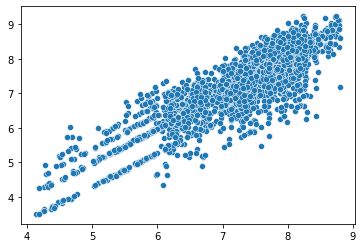

In [51]:
sns.scatterplot(pred,y_test,)

# Applying Decision Tree

In [52]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
pred1 = dtr.predict(X_test)
mean_squared_error(pred1,y_test)
dec_tree = mean_squared_error(pred1,y_test)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

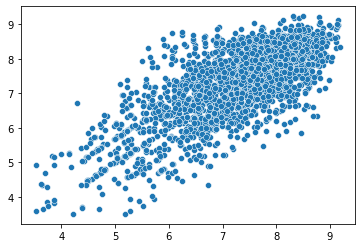

In [54]:
sns.scatterplot(pred1,y_test)

# APPLYING RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [56]:
pred2 = rfc.predict(X_test)
mean_squared_error(pred2,y_test)
rand_fo = mean_squared_error(pred2,y_test)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

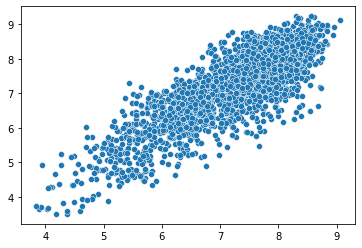

In [57]:
sns.scatterplot(pred2,y_test)

In [58]:
print(r2_score(y_test,pred2))
print(r2_score(y_test,pred1))
print(r2_score(y_test,pred))
print(r2_score(y_train,le.predict(X_train)))

0.6931546947837075
0.48347105038478566
0.7522901989043123
0.7361664940731742


# APPLYING XGBOOST

In [59]:
from xgboost import XGBRegressor
xgb =XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred3=xgb.predict(X_test)
mean_squared_error(y_test,pred3)
print(r2_score(y_test,pred3))
rmse_xgboost = mean_squared_error(y_test,pred3)

0.7141679496773258


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

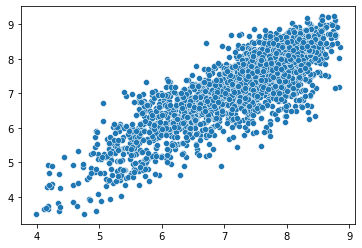

In [61]:
sns.scatterplot(pred3,y_test)

## Using Support Vector Regression

In [62]:
from sklearn.svm import SVR
svr = SVR()

### Using Grid search for best parameters

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svr,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: -27.56 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


In [64]:
svr = SVR(kernel='rbf',C=1,gamma=0.1)
svr.fit(X_train,y_train)

SVR(C=1, gamma=0.1)

In [65]:
pred4 = svr.predict(X_test)
mean_squared_error(y_test,pred4)
rmse_svr = mean_squared_error(y_test,pred4)


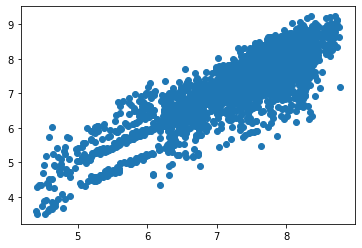

In [71]:
plt.scatter(pred4,y_test)

# Comparing Models

### First Comparing Mean Squared Errors

In [66]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'Mean Squared Error' : [lin_reg,rand_fo,dec_tree,rmse_xgboost,rmse_svr]})
result_df = result.sort_values(by='Mean Squared Error',ascending=True) # Displaying model Mean squared Error in AScending order
result_df = result_df.set_index('Mean Squared Error')
result_df

,Model
Mean Squared Error,
0.263718,LINEAR REGRESSION
0.269006,SVR
0.304304,XGBoost
0.326675,RANDOM FOREST
0.549910,DECISION TREE


### Now Comparing R2 score

In [67]:
result1 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'R2_score' : [r2_score(y_test,pred),r2_score(y_test,pred2),r2_score(y_test,pred1),r2_score(y_test,pred3),r2_score(y_test,pred4)]})
result1_df = result1.sort_values(by='R2_score',ascending=True) # Displaying R2_Score in AScending order
result1_df = result1_df.set_index('R2_score')
result1_df

,Model
R2_score,
0.483471,DECISION TREE
0.693155,RANDOM FOREST
0.714168,XGBoost
0.747323,SVR
0.752290,LINEAR REGRESSION


#### So Linear Regression model Performed Best as It was able to Predict Sales with Least Mean Squared Error Of 0.263718  and R2 score of 0.7522 (which means it was able to explain 75.22% of variability in data)

In [68]:
r2_adj_linear = 1 - (1-r2_score(y_test,pred))*(len(pred)-1)/(len(pred)-14-1)  # Calc. adj. R2 score
r2_adj_dec= 1 - (1-r2_score(y_test,pred1))*(len(pred1)-1)/(len(pred1)-14-1)
r2_adj_rand = 1 - (1-r2_score(y_test,pred2))*(len(pred2)-1)/(len(pred2)-14-1)
r2_adj_xgb = 1 - (1-r2_score(y_test,pred3))*(len(pred3)-1)/(len(pred3)-14-1)
r2_adj_svr = 1 - (1-r2_score(y_test,pred4))*(len(pred4)-1)/(len(pred4)-14-1)



#### Let's check Adjusted R2 Score also

In [69]:
result2 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'R2_adj_score' : [r2_adj_linear,r2_adj_rand,r2_adj_dec,r2_adj_xgb,r2_adj_svr]})
result2_df = result2.sort_values(by='R2_adj_score',ascending=True) # Displaying R2_adj_score in AScending order
result2_df = result2_df.set_index('R2_adj_score')
result2_df

,Model
R2_adj_score,
0.480626,DECISION TREE
0.691465,RANDOM FOREST
0.712594,XGBoost
0.745931,SVR
0.750926,LINEAR REGRESSION


### So as adjusted R2 score is very close to R2 score 

### Let's Check R2 Score for training set too  for top 2 best models which are SVR and Linear Regressor

In [70]:
result3 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','SVR'],
                       'R2_score' : [r2_score(y_train,le.predict(X_train)),r2_score(y_train,svr.predict(X_train))]})
result3_df = result3.sort_values(by='R2_score',ascending=True) # Displaying R2_Score in AScending order
result3_df = result3_df.set_index('R2_score')
result3_df


,Model
R2_score,
0.734699,SVR
0.736166,LINEAR REGRESSION


#### Since R2_score for Training set and test is very close for Both Linear Regression and SVR so we can conclude that both of these Models are not doing overfitting